In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Data_Set.csv')

In [5]:
df.head()

,Year,State,County,HAI,Facility_ID,Facility_Name,Facility_Type,Infections_Reported,Patient_Days,Rate,Rate_CI_95_Lower_Limit,Rate_CI_95_Upper_Limit,Comparison,Months,Rate_2015,Notes
0,2022,California,NaN,Vancomycin-Resistant Enterococcus Bloodstream ...,NaN,NaN,STATE OF CALIFORNIA POOLED DATA - Acute Care H...,655.0,15872140.0,0.41,0.38,0.45,NaN,NaN,NaN,NaN
1,2022,California,NaN,Vancomycin-Resistant Enterococcus Bloodstream ...,NaN,NaN,STATE OF CALIFORNIA POOLED DATA - Community Ho...,205.0,6694501.0,0.31,0.27,0.35,NaN,NaN,NaN,NaN
2,2022,California,NaN,Vancomycin-Resistant Enterococcus Bloodstream ...,NaN,NaN,"STATE OF CALIFORNIA POOLED DATA - Community, <...",25.0,1250333.0,0.20,0.13,0.29,NaN,NaN,NaN,NaN
3,2022,California,NaN,Vancomycin-Resistant Enterococcus Bloodstream ...,NaN,NaN,"STATE OF CALIFORNIA POOLED DATA - Community, 1...",104.0,2448273.0,0.42,0.35,0.51,NaN,NaN,NaN,NaN
4,2022,California,NaN,Vancomycin-Resistant Enterococcus Bloodstream ...,NaN,NaN,"STATE OF CALIFORNIA POOLED DATA - Community, >...",76.0,2995895.0,0.25,0.20,0.32,NaN,NaN,NaN,NaN


In [7]:
df.shape

(1406, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    1406 non-null   int64  
 1   State                   1406 non-null   object 
 2   County                  1370 non-null   object 
 3   HAI                     1406 non-null   object 
 4   Facility_ID             1370 non-null   float64
 5   Facility_Name           1370 non-null   object 
 6   Facility_Type           1406 non-null   object 
 7   Infections_Reported     1381 non-null   float64
 8   Patient_Days            1381 non-null   float64
 9   Rate                    1378 non-null   float64
 10  Rate_CI_95_Lower_Limit  1378 non-null   float64
 11  Rate_CI_95_Upper_Limit  1378 non-null   float64
 12  Comparison              1342 non-null   object 
 13  Months                  1362 non-null   float64
 14  Rate_2015               1213 non-null   

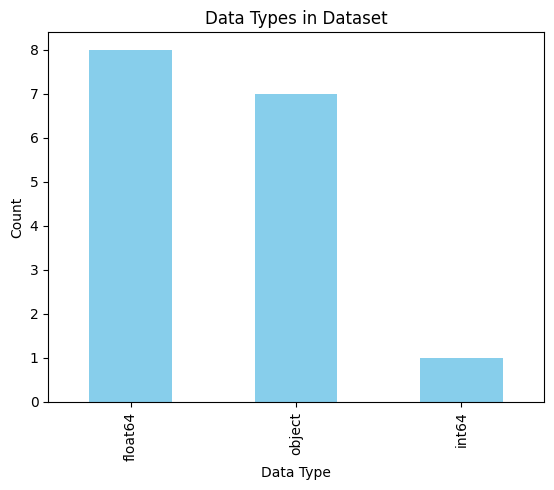

In [22]:
data_types = df.dtypes.value_counts()
data_types.plot(kind='bar', color='skyblue')
plt.title('Data Types in Dataset')
plt.xlabel('Data Type')
plt.ylabel('Count')
plt.show()


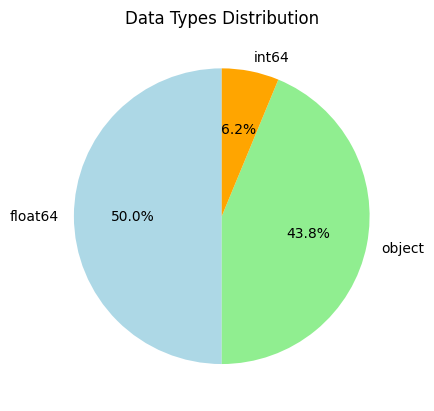

In [23]:
data_types.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'orange'])
plt.title('Data Types Distribution')
plt.ylabel('')  # Remove the y-label for better aesthetics
plt.show()


In [8]:
df.isnull().sum()

Year                         0
State                        0
County                      36
HAI                          0
Facility_ID                 36
Facility_Name               36
Facility_Type                0
Infections_Reported         25
Patient_Days                25
Rate                        28
Rate_CI_95_Lower_Limit      28
Rate_CI_95_Upper_Limit      28
Comparison                  64
Months                      44
Rate_2015                  193
Notes                     1360
dtype: int64

In [10]:
df['County'].unique()

array([nan, 'Alameda', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Tuolumne',
       'Ventura', 'Yolo', 'Yuba'], dtype=object)

In [13]:
df['Facility_ID'].unique()

array([           nan, 1.40000011e+08, 1.40000203e+08, 1.40000012e+08,
       1.40000183e+08, 1.40000034e+08, 1.40001086e+08, 1.40000188e+08,
       6.30015029e+08, 1.40000148e+08, 6.30013913e+08, 1.40000041e+08,
       1.40000199e+08, 1.40000014e+08, 1.40000118e+08, 3.00001080e+07,
       2.30000013e+08, 2.30000405e+08, 2.30000001e+08, 2.30000014e+08,
       3.00001200e+07, 2.30000259e+08, 1.40000195e+08, 1.40000196e+08,
       1.40000187e+08, 6.30011203e+08, 1.40000191e+08, 1.40000190e+08,
       1.40000704e+08, 1.40000016e+08, 1.10000049e+08, 3.00001140e+07,
       3.00001210e+07, 4.00001240e+07, 4.00001220e+07, 4.00000950e+07,
       4.00000960e+07, 4.00001010e+07, 4.00013970e+07, 4.00002540e+07,
       4.00009490e+07, 4.00001260e+07, 4.00006130e+07, 2.30000006e+08,
       1.10000057e+08, 1.10000021e+08, 1.10000045e+08, 1.10000067e+08,
       1.10000069e+08, 9.00000400e+07, 9.00001460e+07, 2.40000037e+08,
       2.40000102e+08, 1.20000411e+08, 1.20000336e+08, 1.20000413e+08,
      

In [15]:
df['Facility_Name'].unique()

array([nan, 'Alameda Hospital',
       'Alta Bates Summit Medical Center - Summit Campus',
       'Alta Bates Summit Medical Center - Summit Campus, Rehabilitation Unit',
       'Alta Bates Summit Medical Center-Alta Bates Campus',
       'Eden Medical Center', 'Highland Hospital',
       'Kaiser Foundation Hospital - Fremont',
       'Kaiser Foundation Hospital - Oakland/Richmond',
       'Kaiser Foundation Hospital - San Leandro',
       'Kindred Hospital - San Francisco Bay Area',
       'San Leandro Hospital', 'St Rose Hospital',
       'Stanford Health Care Tri-Valley',
       "Ucsf Benioff Children's Hospital Oakland", 'Washington Hospital',
       'Sutter Amador Hospital', 'Enloe Medical Center - Esplanade',
       'Enloe Rehabilitation Center', 'Orchard Hospital',
       'Oroville Hospital', 'Mark Twain Medical Center',
       'Colusa Medical Center', 'Contra Costa Regional Medical Center',
       'John Muir Medical Center-Concord Campus',
       'John Muir Medical Center-Walnu

In [19]:
df['Patient_Days']

0       15872140.0
1        6694501.0
2        1250333.0
3        2448273.0
4        2995895.0
           ...    
1401       23566.0
1402        4584.0
1403       16704.0
1404       15308.0
1405       64634.0
Name: Patient_Days, Length: 1406, dtype: float64

### Data Cleaning

In [32]:
df.isnull().sum()

Year                         0
State                        0
County                      36
HAI                          0
Facility_ID                 36
Facility_Name               36
Facility_Type                0
Infections_Reported         25
Patient_Days                25
Rate                        28
Rate_CI_95_Lower_Limit      28
Rate_CI_95_Upper_Limit      28
Comparison                  64
Months                      44
Rate_2015                  193
Notes                     1360
dtype: int64

In [37]:
# That have 30 grater than data
df['County'].duplicated()

0       False
1        True
2        True
3        True
4        True
        ...  
1401     True
1402     True
1403     True
1404     True
1405     True
Name: County, Length: 1406, dtype: bool